# Week 12: Network Analysis in Python

---
# Course: Network Analysis in Python Part I
- [DataCamp course link](https://www.datacamp.com/courses/network-analysis-in-python-part-1)

In [1]:
# Pre-load modules used later
from IPython.display import Image
import matplotlib.pyplot as plt

## Chapter 1: Introduction to networks
- [Slides](slides/ch1_slides.pdf)


### NetworkX
[NetworkX library](https://networkx.github.io/)

In [2]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from([1, 2, 3])
print('Nodes:', g.nodes())

g.add_edge(1, 2)
print('Edges:', g.edges())

# Set attributes with easy accessors
g.nodes[2]['location'] = 'OHR'
g.nodes[2]['capacity'] = '350'
print('Node 2 attributes/metadata:', g.nodes[2])

Nodes: [1, 2, 3]
Edges: [(1, 2)]
Node 2 attributes/metadata: {'location': 'OHR', 'capacity': '350'}


### Types of graphs
- Undirected -- `nx.Graph()`
- Directed -- `nx.DiGraph()`
- Multiple edge undirected -- `nx.MultiGraph()`
- Multiple edge directed -- `nx.MultiDiGraph()`


- Edges support weights
- Self-loops -- `g.number_of_selfloops()`

### Visualization
- Network plot
- Matrix plot
- Arc plot
- Circos plot

In [19]:
#
# Set up sample graphs
#
import numpy as np
matrix = np.matrix([
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]
        ])
g_medium = nx.from_numpy_matrix(matrix)

g_big = nx.erdos_renyi_graph(n=30, p=0.1)

# Set the nodes' degree attribute
for n, d in g_big.nodes(data=True):
    # Calculate the degree of each node: G.node[n]['degree'
    g_big.node[n]['degree'] = nx.degree(g_big, n)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


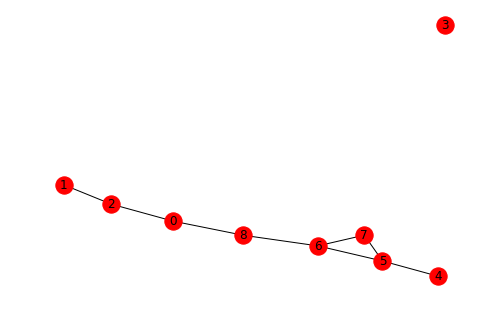

In [4]:
#
# Create standard network graph plot
#
nx.draw(g_medium, with_labels=True)
plt.show()

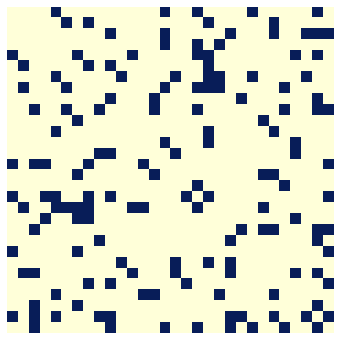

In [14]:
#
# Create matrix plot
#
import nxviz as nv

mp = nv.MatrixPlot(g_big)
mp.draw()
plt.show()

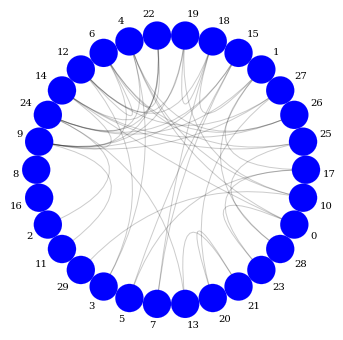

In [25]:
#
# Create circos plot
#
from nxviz import CircosPlot

cp = CircosPlot(graph=g_big, node_order='degree', node_labels=True)
cp.draw()
plt.show()

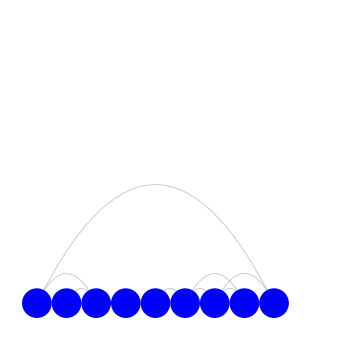

In [7]:
#
# Create arc plot
#
from nxviz import ArcPlot

ap = ArcPlot(g_medium)
ap.draw()
plt.show()

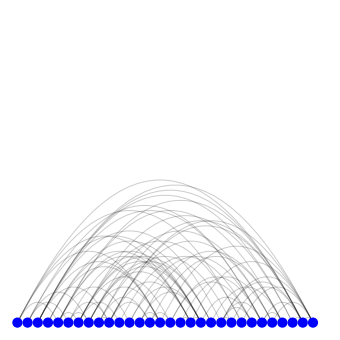

In [8]:
# Plot a bigger one!
ap = ArcPlot(g_big)
ap.draw()
plt.show()

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


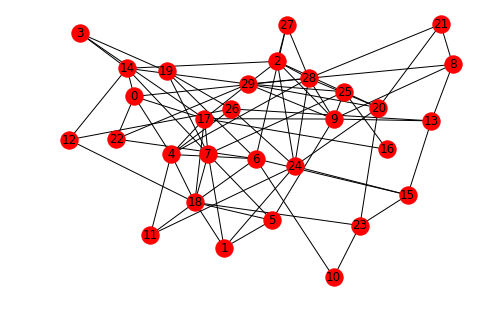

In [9]:
nx.draw(g_big, with_labels=True)
plt.show()

## Chapter 2: Important nodes
- [Slides](slides/ch2_slides.pdf)


- **Degree centrality**:
>*
\begin{equation}
\frac{\text{number of neighbors node has}}{\text{total number of neighbors possible}}
\end{equation}
>*

In [10]:
# Get # of neighbors of a node
print('All nodes:', g_medium.nodes())
print('Neighbors of node 2:', [x for x in g_medium.neighbors(2)])
print('Degree centrality of graph:')
nx.degree_centrality(g_medium)

All nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8]
Neighbors of node 2: [0, 1]
Degree centrality of graph:


{0: 0.25,
 1: 0.125,
 2: 0.25,
 3: 0.0,
 4: 0.125,
 5: 0.625,
 6: 0.375,
 7: 0.25,
 8: 0.25}

### Pathfinding
- **Breadth-first search (BFS)**
- **All shortest paths** -- The set of all shortest paths for all pairs of nodes. 
- **Betweenness centrality**:
>*
\begin{equation}
\frac{\text{number of shortest paths thru a node}}{\text{total number of shortest paths}}
\end{equation}
>*

    - This measures the "bottleneck" nodes vs. "highly connected" nodes which degree centrality measures.


In [11]:
print('Betweenness centrality of graph:')
nx.betweenness_centrality(g_medium)

Betweenness centrality of graph:


{0: 0.3571428571428571,
 1: 0.0,
 2: 0.21428571428571427,
 3: 0.0,
 4: 0.0,
 5: 0.21428571428571427,
 6: 0.42857142857142855,
 7: 0.0,
 8: 0.42857142857142855}

## Chapter 3: Structures
- [Slides](slides/ch3_slides.pdf)


- **Network clique** -- A fully-connected graph.
    - Triangles are the simplest complex clique (more than one edge).
    - Used to suggest social network friend recommendations ("triangle closures")!
- **Maximal cliques** -- A clique that when extended by one node is no longer fully connected.
    - Used for finding communities.
    - `nx.find_cliques(G)` -- Returns generator of all *maximal* cliques.
- **Subgraphs**
    - `G.subgraph(nodes)`

In [12]:
list(nx.find_cliques(g_medium))

[[0, 8], [0, 2], [1, 2], [3], [5, 4], [5, 6, 7], [8, 6]]

## Chapter 4: Bringing it all together (case study)
- [Slides](slides/ch4_slides.pdf)


Programming exercise using GitHub user/collaborations graph.
- **Connected component subgraphs** -- Set of connected nodes in a graph which are disconnected from all other nodes.

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


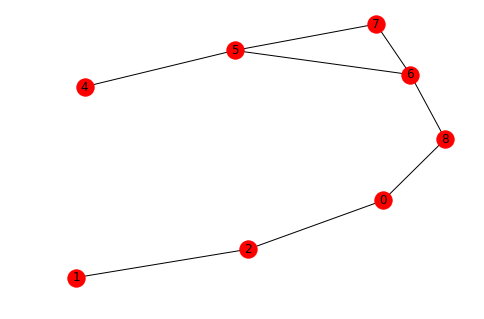

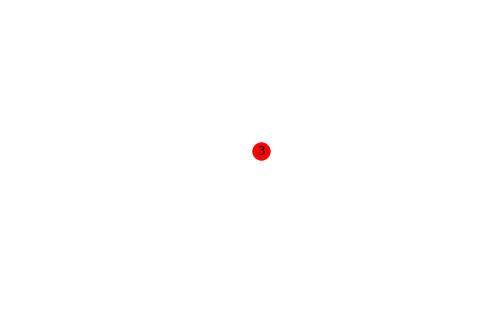

In [13]:
for g in nx.connected_component_subgraphs(g_medium):
    nx.draw(g_medium.subgraph(g.nodes), with_labels=True)
    plt.show()